In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.tree import DecisionTreeClassifier
import spotipy

In [4]:
artist_data = pd.read_csv('C:/Users/USER/Documents/python/ML/Python ML/project/data_by_artist_o.csv')
genre_data = pd.read_csv('C:/Users/USER/Documents/python/ML/Python ML/project/data_by_genres_o.csv')
data_by_year = pd.read_csv('C:/Users/USER/Documents/python/ML/Python ML/project/data_by_year_o.csv')
data_o = pd.read_csv('C:/Users/USER/Documents/python/ML/Python ML/project/data_o.csv')
tracks_data = pd.read_csv('C:/Users/USER/Documents/python/ML/Python ML/project/tracks.csv')

In [5]:
artist_data

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2


In [6]:
artist_data.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [7]:
# import spotipy.util as util
# from spotipy.oauth2 import SpotifyClientCredentials
# cid = ""
# secret = ""
# username = ""
# client_credentials_manager = SpotifyClientCredentials(client_id='8e25b45b3dc141958ea55fc50a0b212d', 
#                                                       client_secret='51fc11d4da824072a95d400c4122416b')
# sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
# playlists = sp.user_playlists('Project')

In [8]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

<AxesSubplot:xlabel='mode', ylabel='count'>

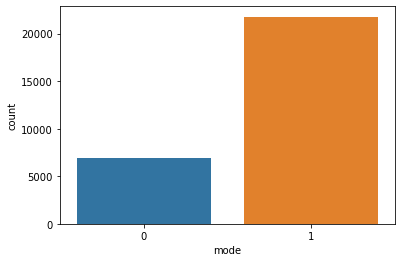

In [9]:
sb.countplot(x='mode',data=artist_data)

In [10]:
artist_data.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [11]:
X=artist_data.iloc[:,1:].values
y=artist_data.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 4)

In [12]:
X

array([['"Cats" 1981 Original London Cast', 0.5901111111111111,
        0.4672222222222222, ..., 5, 1, 9],
       ['"Cats" 1983 Broadway Cast', 0.8625384615384617,
        0.4417307692307693, ..., 5, 1, 26],
       ['"Fiddler On The Roof” Motion Picture Chorus',
        0.8565714285714285, 0.34828571428571425, ..., 0, 1, 7],
       ...,
       ['黃國隆', 0.7854545454545453, 0.5708181818181818, ..., 5, 1, 11],
       ['黑豹', 0.381, 0.353, ..., 11, 1, 2],
       ['조정현', 0.568, 0.447, ..., 10, 1, 2]], dtype=object)

In [13]:
y

array(["['show tunes']", '[]', '[]', ..., '[]',
       "['chinese indie', 'chinese indie rock']",
       "['classic korean pop']"], dtype=object)

In [14]:
X_train.shape

(22944, 15)

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(artist_data.iloc[:,-1:], dtype = float))
X.shape

(28680, 1)

In [16]:
genre_data

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [17]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [18]:
genre_data=genre_data.drop(['duration_ms'],axis=1)

In [19]:
genre_data.tail()

,mode,genres,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
2968,1,zolo,0.222625,0.547082,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7
2972,1,zydeco,0.421038,0.629409,0.609369,0.019248,0.255877,-9.854825,0.050491,126.366087,0.808544,30.261905,7


In [20]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   energy            2973 non-null   float64
 5   instrumentalness  2973 non-null   float64
 6   liveness          2973 non-null   float64
 7   loudness          2973 non-null   float64
 8   speechiness       2973 non-null   float64
 9   tempo             2973 non-null   float64
 10  valence           2973 non-null   float64
 11  popularity        2973 non-null   float64
 12  key               2973 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 302.1+ KB


<AxesSubplot:xlabel='mode', ylabel='count'>

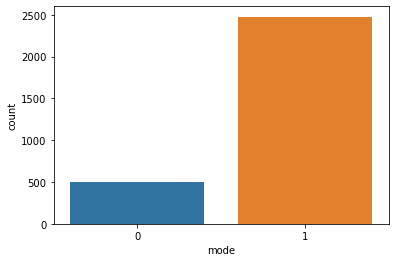

In [21]:
sb.countplot(x='mode',data=genre_data)

In [22]:
# genre_data=genre_data.iloc[:,-1]   #Encoding the labels
# genre_data

In [23]:
X=genre_data.iloc[:,1:].values
y=genre_data.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 4)

In [24]:
X

array([['21st century classical', 0.9793333333333332,
        0.16288333333333335, ..., 0.10378333333333334, 27.83333333333333,
        6],
       ['432hz', 0.49478, 0.2993333333333333, ..., 0.22175, 52.5, 5],
       ['8-bit', 0.762, 0.7120000000000001, ..., 0.975, 48.0, 7],
       ...,
       ['zouk', 0.2632611111111112, 0.7488888888888888, ...,
        0.8241111111111111, 46.66666666666666, 5],
       ['zurich indie', 0.993, 0.7056666666666666, ...,
        0.7390000000000001, 0.0, 7],
       ['zydeco', 0.4210384920634921, 0.6294087301587301, ...,
        0.8085436507936509, 30.26190476190477, 7]], dtype=object)

In [25]:
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [26]:
X_train.shape

(2378, 12)

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(genre_data.iloc[:,-1:], dtype = float))
X.shape

(2973, 1)

In [31]:
import plotly.express as px
top10_genres = genre_data.nlargest(10, 'popularity')
fig = px.bar(top10_genres, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [29]:
data_by_year

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [30]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [32]:
data_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


<AxesSubplot:xlabel='mode', ylabel='count'>

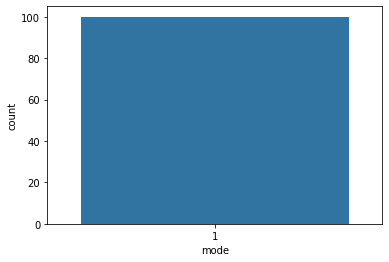

In [33]:
sb.countplot(x='mode',data=data_by_year)

In [34]:
X=data_by_year.iloc[:,1:].values
y=data_by_year.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 4)

In [35]:
X

array([[1.92100000e+03, 8.86896000e-01, 4.18597333e-01, ...,
        3.79326667e-01, 6.53333333e-01, 2.00000000e+00],
       [1.92200000e+03, 9.38591549e-01, 4.82042254e-01, ...,
        5.35549296e-01, 1.40845070e-01, 1.00000000e+01],
       [1.92300000e+03, 9.57246791e-01, 5.77340541e-01, ...,
        6.25492432e-01, 5.38918919e+00, 0.00000000e+00],
       ...,
       [2.01800000e+03, 2.67632991e-01, 6.63500476e-01, ...,
        4.47921274e-01, 6.32962435e+01, 1.00000000e+00],
       [2.01900000e+03, 2.78298586e-01, 6.44814110e-01, ...,
        4.58817630e-01, 6.52565418e+01, 1.00000000e+00],
       [2.02000000e+03, 2.19930888e-01, 6.92904335e-01, ...,
        5.01047808e-01, 6.43019704e+01, 1.00000000e+00]])

In [36]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [37]:
data_by_year.shape

(100, 14)

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data_by_year.iloc[:,-1:], dtype = float))
X.shape

(100, 1)

In [39]:
data_o

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [40]:
data_o.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [41]:
data_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

<AxesSubplot:xlabel='mode', ylabel='count'>

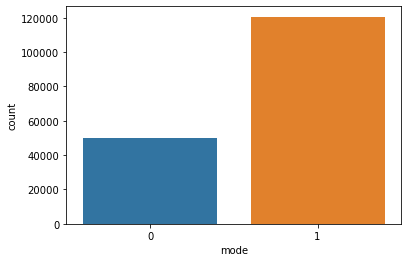

In [42]:
sb.countplot(x='mode',data=data_o)

In [43]:
X=data_o.iloc[:,1:].values
y=data_o.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 4)

In [44]:
X

array([[1921, 0.982,
        "['Sergei Rachmaninoff', 'James Levine', 'Berliner Philharmoniker']",
        ..., '1921', 0.0366, 80.954],
       [1921, 0.732, "['Dennis Day']", ..., '1921', 0.415,
        60.93600000000001],
       [1921, 0.961,
        "['KHP Kridhamardawa Karaton Ngayogyakarta Hadiningrat']", ...,
        '1921', 0.0339, 110.339],
       ...,
       [2020, 0.10099999999999999, "['MAMAMOO']", ..., '2020-11-03',
        0.0809, 91.68799999999999],
       [2020, 0.00998, "['Eminem']", ..., '2020-01-17', 0.308, 75.055],
       [2020, 0.132, "['KEVVO', 'J Balvin']", ..., '2020-10-16',
        0.10800000000000001, 94.991]], dtype=object)

In [45]:
y

array([0.0594, 0.963 , 0.0394, ..., 0.637 , 0.195 , 0.642 ])

In [46]:
data_o.shape

(170653, 19)

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data_o.iloc[:,-1:], dtype = float))
X.shape

(170653, 1)

In [48]:
tracks_data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [49]:
tracks_data.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [50]:
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

<AxesSubplot:xlabel='mode', ylabel='count'>

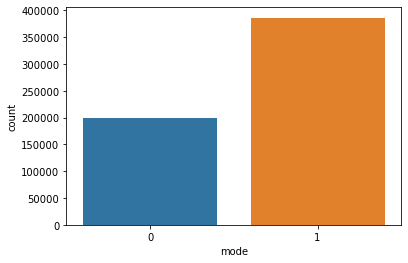

In [51]:
sb.countplot(x='mode',data=tracks_data)

In [52]:
X=tracks_data.iloc[:,1:].values
y=tracks_data.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 4)

In [53]:
X

array([['Carve', 6, 126903, ..., 0.127, 104.851, 3],
       ['Capítulo 2.16 - Banquero Anarquista', 0, 98200, ..., 0.655,
        102.009, 1],
       ['Vivo para Quererte - Remasterizado', 0, 181640, ..., 0.457,
        130.418, 5],
       ...,
       ["What They'll Say About Us", 70, 187601, ..., 0.0663, 145.095, 4],
       ['A Day At A Time', 58, 142003, ..., 0.43799999999999994, 90.029,
        4],
       ['Mar de Emociones', 38, 214360, ..., 0.975, 112.204, 4]],
      dtype=object)

In [54]:
y

array(['35iwgR4jXetI318WEWsa1Q', '021ht4sdgPcrDgSk7JTbKY',
       '07A5yehtSnoedViJAZkNnc', ..., '27Y1N4Q4U3EfDU5Ubw8ws2',
       '45XJsGpFTyzbzeWK8VzR8S', '5Ocn6dZ3BJFPWh4ylwFXtn'], dtype=object)

In [55]:
tracks_data.shape

(586672, 20)

In [56]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(tracks_data.iloc[:,-1:], dtype = float))
X.shape

(586672, 1)

In [57]:
tracks_data.drop(['id_artists'], axis=1, inplace=True)  # Droping id_artist

In [58]:
tracks_data.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


VISUALISING THE GENRE CLUSTER

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



In [60]:
from sklearn.manifold import TSNE
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.377s...
[t-SNE] Computed neighbors for 2973 samples in 0.929s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.744100
[t-SNE] Computed conditional probabilities in 0.451s
[t-SNE] Iteration 50: error = 82.0686493, gradient norm = 0.0270237 (50 iterations in 1.841s)
[t-SNE] Iteration 100: error = 75.9684753, gradient norm = 0.0158071 (50 iterations in 1.108s)
[t-SNE] Iteration 150: error = 75.6914902, gradient norm = 0.0016667 (50 iterations in 1.186s)
[t-SNE] Iteration 200: error = 75.6163025, gradient norm = 0.0010248 (50 iterations in 1.119s)
[t-SNE] Iteration 250: error = 75.5429688, gradient norm = 0.0003813 (50 iterations in 1.044s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.542969
[t-SNE] Iteration 300: erro

Clustring Song (K-MEAN) ---- for artist_data

In [61]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = artist_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
artist_data['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
Initialization complete


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



Iteration 0, inertia 238708.78081884058
Iteration 1, inertia 197189.10272526482
Iteration 2, inertia 191269.45613332282
Iteration 3, inertia 186779.69972979414
Iteration 4, inertia 183277.2943526257
Iteration 5, inertia 181378.265123748
Iteration 6, inertia 180214.48311852157
Iteration 7, inertia 179492.07494220274
Iteration 8, inertia 179044.38530625275
Iteration 9, inertia 178706.9692297368
Iteration 10, inertia 178425.4973506064
Iteration 11, inertia 178199.85084143723
Iteration 12, inertia 177989.82093938548
Iteration 13, inertia 177798.7263940576
Iteration 14, inertia 177640.70378964013
Iteration 15, inertia 177523.927497414
Iteration 16, inertia 177426.68500098446
Iteration 17, inertia 177354.8603557377
Iteration 18, inertia 177304.36323407077
Iteration 19, inertia 177262.0280912957
Iteration 20, inertia 177229.39216460852
Iteration 21, inertia 177210.39026909953
Iteration 22, inertia 177198.215077953
Iteration 23, inertia 177187.66157346175
Iteration 24, inertia 177178.998645975

Iteration 44, inertia 177424.3838626116
Iteration 45, inertia 177422.8570945777
Iteration 46, inertia 177421.2251671441
Iteration 47, inertia 177419.94493289257
Iteration 48, inertia 177418.94247322547
Iteration 49, inertia 177418.32150188493
Iteration 50, inertia 177417.98325486458
Iteration 51, inertia 177417.66107254007
Converged at iteration 51: center shift 9.970733180775738e-05 within tolerance 9.999999999999715e-05.
Initialization complete
Iteration 0, inertia 237794.14058517394
Iteration 1, inertia 195153.6728191584
Iteration 2, inertia 190052.473821242
Iteration 3, inertia 186378.51266477688
Iteration 4, inertia 184132.99883537192
Iteration 5, inertia 183166.8955563868
Iteration 6, inertia 182654.7196346119
Iteration 7, inertia 182337.85773448725
Iteration 8, inertia 182097.50624816335
Iteration 9, inertia 181946.75405057648
Iteration 10, inertia 181807.7485972362
Iteration 11, inertia 181636.9855756505
Iteration 12, inertia 181461.4038893458
Iteration 13, inertia 181299.01057

Iteration 25, inertia 177611.22782919114
Iteration 26, inertia 177590.78470401102
Iteration 27, inertia 177568.9279582038
Iteration 28, inertia 177548.61158701443
Iteration 29, inertia 177524.99205135877
Iteration 30, inertia 177487.76575352394
Iteration 31, inertia 177435.97710350345
Iteration 32, inertia 177344.5490602335
Iteration 33, inertia 177226.46532169194
Iteration 34, inertia 177086.0289982155
Iteration 35, inertia 176956.26206597371
Iteration 36, inertia 176882.42577470248
Iteration 37, inertia 176845.38802645952
Iteration 38, inertia 176811.68602556712
Iteration 39, inertia 176793.27895568675
Iteration 40, inertia 176783.47145704608
Iteration 41, inertia 176779.40731262794
Iteration 42, inertia 176778.15592086458
Iteration 43, inertia 176777.78202776
Iteration 44, inertia 176777.3868073955
Converged at iteration 44: center shift 1.9191719999955076e-05 within tolerance 9.999999999999715e-05.
Initialization complete
Iteration 0, inertia 246324.62284978703
Iteration 1, inertia

Clustring Song (K-MEAN) ---- for genre_data

In [62]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = genre_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
genre_data['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
Initialization complete
Iteration 0, inertia 19132.08318401995
Iteration 1, inertia 15515.97336339867
Iteration 2, inertia 14968.27391786626
Iteration 3, inertia 14552.431689023064
Iteration 4, inertia 14372.133687338677
Iteration 5, inertia 14231.515413647296
Iteration 6, inertia 14183.530628594144
Iteration 7, inertia 14161.684994529134
Iteration 8, inertia 14147.748492729464
Iteration 9, inertia 14134.829134733585
Iteration 10, inertia 14125.60429776421
Iteration 11, inertia 14119.83030487816
Iteration 12, inertia 14112.526197471152
Iteration 13, inertia 14098.32503261195
Iteration 14, inertia 14066.611072301997
Iteration 15, inertia 14059.87094788729
Iteration 16, inertia 14058.123739738317
Iteration 17, inertia 14056.394694103794
Iteration 18, inertia 14055.984816814038
Iteration 19, inertia 14055.786849629572
Iteration 20, inertia 14055.537698079343
Iteration 21, inertia 14055.428517010783
Iteration 22, inerti

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.




Iteration 44, inertia 13856.308400636652
Iteration 45, inertia 13855.964006210648
Iteration 46, inertia 13855.62031231445
Iteration 47, inertia 13855.50529403274
Iteration 48, inertia 13855.461936953368
Converged at iteration 48: strict convergence.
Initialization complete
Iteration 0, inertia 19734.0574249257
Iteration 1, inertia 15409.285158967405
Iteration 2, inertia 14745.904462809918
Iteration 3, inertia 14435.201210174771
Iteration 4, inertia 14285.74062925623
Iteration 5, inertia 14195.964001275293
Iteration 6, inertia 14173.27308844915
Iteration 7, inertia 14169.276887868009
Iteration 8, inertia 14165.619579153588
Iteration 9, inertia 14162.838598033979
Iteration 10, inertia 14161.191407934117
Iteration 11, inertia 14161.00812255713
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 19148.518701697238
Iteration 1, inertia 15339.10302776584
Iteration 2, inertia 14791.242419224509
Iteration 3, inertia 14508.767436660368
Iteration 4, inert

Iteration 20, inertia 14257.828422812396
Iteration 21, inertia 14252.829371160396
Iteration 22, inertia 14246.802570938184
Iteration 23, inertia 14239.489787670087
Iteration 24, inertia 14223.317148863493
Iteration 25, inertia 14210.52959144013
Iteration 26, inertia 14198.954164608112
Iteration 27, inertia 14189.252157556122
Iteration 28, inertia 14178.160652058394
Iteration 29, inertia 14165.768400628196
Iteration 30, inertia 14154.224391900205
Iteration 31, inertia 14142.972351986791
Iteration 32, inertia 14132.097968720816
Iteration 33, inertia 14122.66081532645
Iteration 34, inertia 14118.198960112017
Iteration 35, inertia 14116.475232692643
Iteration 36, inertia 14110.424760108352
Iteration 37, inertia 14102.383701465165
Iteration 38, inertia 14089.058846445361
Iteration 39, inertia 14079.399767074874
Iteration 40, inertia 14075.3437731525
Iteration 41, inertia 14073.12495188131
Iteration 42, inertia 14072.1485530492
Iteration 43, inertia 14070.148994179339
Iteration 44, inertia 1

Clustring Song (K-MEAN) ---- for data_by_year

In [63]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = data_by_year.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data_by_year['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
Initialization complete
Iteration 0, inertia 187.10286351988418
Iteration 1, inertia 128.68717777394318
Iteration 2, inertia 127.52925334075996
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 185.15876284599312
Iteration 1, inertia 130.3857561975872
Iteration 2, inertia 129.5581963240679
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 180.12248548801992
Iteration 1, inertia 126.7374296298804
Iteration 2, inertia 123.25091489855366
Iteration 3, inertia 122.07732407235105
Iteration 4, inertia 121.91981060904655
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 183.40287109093126
Iteration 1, inertia 129.89144047538525
Iteration 2, inertia 126.16234375216246
Iteration 3, inertia 125.5477928425226
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 183.4902

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



Clustring Song (K-MEAN) ---- for data_o

In [64]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = data_o.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
data_o['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



Initialization complete
Iteration 0, inertia 1549976.1069066233
Iteration 1, inertia 1182961.6031633893
Iteration 2, inertia 1149258.2853750158
Iteration 3, inertia 1127834.5094590373
Iteration 4, inertia 1112539.5067367824
Iteration 5, inertia 1100265.973875105
Iteration 6, inertia 1091804.2001483364
Iteration 7, inertia 1085688.3568350333
Iteration 8, inertia 1080833.0446590814
Iteration 9, inertia 1078304.2374937653
Iteration 10, inertia 1076487.1125055235
Iteration 11, inertia 1075012.9750696383
Iteration 12, inertia 1073970.911254775
Iteration 13, inertia 1073173.8086606907
Iteration 14, inertia 1072403.5862432986
Iteration 15, inertia 1071468.3254294032
Iteration 16, inertia 1070807.9668929714
Iteration 17, inertia 1070489.1862372728
Iteration 18, inertia 1070326.9192143842
Iteration 19, inertia 1070227.7411763526
Iteration 20, inertia 1070154.013055859
Iteration 21, inertia 1070086.7445213748
Iteration 22, inertia 1070033.2889036713
Iteration 23, inertia 1069988.1951562725
Itera

Iteration 61, inertia 1057110.8501815554
Iteration 62, inertia 1057054.6942099684
Iteration 63, inertia 1057008.7622634517
Iteration 64, inertia 1056968.5485990709
Iteration 65, inertia 1056932.0372048619
Iteration 66, inertia 1056903.2842611733
Iteration 67, inertia 1056882.18766816
Iteration 68, inertia 1056865.948729847
Iteration 69, inertia 1056850.7808514968
Iteration 70, inertia 1056837.7710391788
Iteration 71, inertia 1056825.5586670472
Iteration 72, inertia 1056812.7495860087
Iteration 73, inertia 1056801.9075029197
Iteration 74, inertia 1056793.7139499919
Iteration 75, inertia 1056787.6414808666
Iteration 76, inertia 1056783.3324232749
Iteration 77, inertia 1056780.1328933372
Iteration 78, inertia 1056777.4485990475
Iteration 79, inertia 1056775.1521036301
Converged at iteration 79: center shift 8.233024211875799e-05 within tolerance 0.00010000000000000789.
Initialization complete
Iteration 0, inertia 1552707.9479530263
Iteration 1, inertia 1197045.9907598954
Iteration 2, iner

Iteration 33, inertia 1055661.062438121
Iteration 34, inertia 1055655.503595984
Iteration 35, inertia 1055651.608390453
Iteration 36, inertia 1055649.2411698923
Converged at iteration 36: center shift 8.397458627270438e-05 within tolerance 0.00010000000000000789.
Initialization complete
Iteration 0, inertia 1586182.395475328
Iteration 1, inertia 1153936.982546844
Iteration 2, inertia 1121519.7154205875
Iteration 3, inertia 1108545.7790482605
Iteration 4, inertia 1099729.974681361
Iteration 5, inertia 1093244.8307931973
Iteration 6, inertia 1088601.1536206773
Iteration 7, inertia 1085294.2913959937
Iteration 8, inertia 1083036.1435633057
Iteration 9, inertia 1081572.7563418457
Iteration 10, inertia 1080599.1740830103
Iteration 11, inertia 1079897.0202709043
Iteration 12, inertia 1079378.6436404279
Iteration 13, inertia 1078944.9482371532
Iteration 14, inertia 1078549.7282936973
Iteration 15, inertia 1078178.701797732
Iteration 16, inertia 1077810.6636226538
Iteration 17, inertia 1077422

Clustring Song (K-MEAN) ---- for tracks_data

In [65]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=2, n_jobs=4))],verbose=True)
X = tracks_data.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
tracks_data['cluster_label'] = song_cluster_labels

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.4s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning:

'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.



Initialization complete
Iteration 0, inertia 5625652.47323532
Iteration 1, inertia 4351897.526220409
Iteration 2, inertia 4188619.595116361
Iteration 3, inertia 4092495.345168181
Iteration 4, inertia 4050555.553392722
Iteration 5, inertia 4034927.947240128
Iteration 6, inertia 4025420.4071286707
Iteration 7, inertia 4019246.5136375246
Iteration 8, inertia 4014928.727644991
Iteration 9, inertia 4011475.3649787563
Iteration 10, inertia 4008567.1638108483
Iteration 11, inertia 4005823.502053765
Iteration 12, inertia 4002882.8067296795
Iteration 13, inertia 3999944.2653360288
Iteration 14, inertia 3998047.606454072
Iteration 15, inertia 3996634.3326287093
Iteration 16, inertia 3995436.8717004387
Iteration 17, inertia 3994411.6039821967
Iteration 18, inertia 3993465.5963669866
Iteration 19, inertia 3992550.1351243285
Iteration 20, inertia 3991644.384680964
Iteration 21, inertia 3990720.0212275307
Iteration 22, inertia 3989745.8772628945
Iteration 23, inertia 3988695.1330287955
Iteration 24,

Iteration 16, inertia 4020841.119351476
Iteration 17, inertia 4019305.92314821
Iteration 18, inertia 4018141.600252024
Iteration 19, inertia 4017234.848275061
Iteration 20, inertia 4016502.9202561514
Iteration 21, inertia 4015945.126611312
Iteration 22, inertia 4015496.4643097725
Iteration 23, inertia 4015133.8262004354
Iteration 24, inertia 4014837.1413572608
Iteration 25, inertia 4014601.5933864824
Iteration 26, inertia 4014424.855142757
Iteration 27, inertia 4014290.682653204
Iteration 28, inertia 4014193.0416406197
Iteration 29, inertia 4014120.522002229
Iteration 30, inertia 4014065.346680844
Iteration 31, inertia 4014023.413227147
Iteration 32, inertia 4013987.6620382755
Iteration 33, inertia 4013958.5147845517
Iteration 34, inertia 4013936.166711174
Iteration 35, inertia 4013916.285920215
Iteration 36, inertia 4013897.4467503303
Iteration 37, inertia 4013879.346877654
Iteration 38, inertia 4013861.9951678677
Iteration 39, inertia 4013846.5022616596
Iteration 40, inertia 4013834.

Iteration 50, inertia 3891542.5084502012
Iteration 51, inertia 3891447.780647342
Iteration 52, inertia 3891334.6598760076
Iteration 53, inertia 3891208.3634766834
Iteration 54, inertia 3891067.0914140157
Iteration 55, inertia 3890901.402587789
Iteration 56, inertia 3890707.7629119707
Iteration 57, inertia 3890505.0500390823
Iteration 58, inertia 3890284.035838973
Iteration 59, inertia 3890018.607859095
Iteration 60, inertia 3889716.470836399
Iteration 61, inertia 3889405.268020188
Iteration 62, inertia 3889096.797817932
Iteration 63, inertia 3888793.1230707313
Iteration 64, inertia 3888488.936706344
Iteration 65, inertia 3888185.559684251
Iteration 66, inertia 3887898.513874331
Iteration 67, inertia 3887637.099766815
Iteration 68, inertia 3887397.645992387
Iteration 69, inertia 3887159.7246748675
Iteration 70, inertia 3886930.8135778406
Iteration 71, inertia 3886703.262151314
Iteration 72, inertia 3886475.172347299
Iteration 73, inertia 3886270.776850324
Iteration 74, inertia 3886080.2

Iteration 57, inertia 3930383.4867133005
Iteration 58, inertia 3930329.0146647505
Iteration 59, inertia 3930281.864501175
Iteration 60, inertia 3930239.742753243
Iteration 61, inertia 3930202.425193293
Iteration 62, inertia 3930166.7693356546
Iteration 63, inertia 3930134.3736413694
Iteration 64, inertia 3930104.265245564
Iteration 65, inertia 3930080.203908871
Iteration 66, inertia 3930061.7989651705
Iteration 67, inertia 3930047.643290437
Iteration 68, inertia 3930036.1960604386
Iteration 69, inertia 3930026.2677845443
Iteration 70, inertia 3930017.2038809415
Iteration 71, inertia 3930009.503138569
Iteration 72, inertia 3930002.0517444727
Converged at iteration 72: center shift 9.179733447446618e-05 within tolerance 0.00010000000000000265.
Initialization complete
Iteration 0, inertia 5665907.099345391
Iteration 1, inertia 4356985.040036445
Iteration 2, inertia 4192579.008020658
Iteration 3, inertia 4119060.0699386946
Iteration 4, inertia 4075445.3204201804
Iteration 5, inertia 403716

---Vectorizer---

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.DataFrame(tracks_data)
v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
X_names_sparse = v.fit_transform(tracks_data)
X_names_sparse.shape

(20, 20)

PRINCIPAL COMPONENT ANALYSIS

In [68]:
from sklearn.decomposition import PCA

